> GROUP 10
Early Depression Detection using NLP

**This file demonstrates the use of NLP to predict early depression**

Group Members:
1. DIPAN SHAH 1171547
2. DHRUVA SHAH 1165998
3. KRISHNA GANDHI 1170559
4. PALAK PATEL 1166610
5. SACHIN SINGH 1141124

In [1]:
# Importing all nessesary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import gensim
import spacy
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all nessesary libraries.
from nltk.corpus import stopwords
from nltk import FreqDist
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from gensim.utils import simple_preprocess
from wordcloud import WordCloud

We have use topic modeling to apply unsupervised learning techinque using two popular methods LatentDirichletAllocation(LDA) and Non-negative Matrix Factorization(NMF) to self label the tweets in our dataset, the reason we choose this approach to analyze if we could boost the model performance. Hence, two new datasets with label have been created and same have been submitted in the final submission folder.

In [3]:
#NOTE: Please change the paths here with the your local file path.

original_data_path = '../input/nlp-data-2/final_data1 (1).csv'# this is original data.
lda_data_path = '../input/lda-and-nmf/dataset_lda.csv'# this is data created after topic modeling using LDA
nmf_data_path = '../input/lda-and-nmf/dataset_nmf.csv' # this is data created after topic modeling using NMF

In [4]:
# Loading all the three dataset as Dataframes
Original_dataset = pd.read_csv(original_data_path)
LDA_dataset = pd.read_csv(lda_data_path)
NMF_dataset = pd.read_csv(nmf_data_path)

GLIMS OF ALL THE THREE DATASETS

In [5]:
Original_dataset

,Unnamed: 0,text,new_label
0,0.0,just had a real good moment. i missssssssss hi...,0
1,1.0,is reading manga http://plurk.com/p/mzp1e,0
2,2.0,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,3.0,@lapcat Need to send 'em to my accountant tomo...,0
4,4.0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
19708,NaN,actual can’t tell you how depressed I am to ha...,1
19709,NaN,To vendo a série da viih tube e eu acho que eu...,1
19710,NaN,"I was never depressed, just cared",1
19711,NaN,If Starling Marte does get traded I hope he go...,1


In [6]:
# Dropped unnecessary columns
Original_dataset = Original_dataset.drop('Unnamed: 0', axis=1)

In [7]:
# Copying the label value from all the three datasets.
Original_data_l = Original_dataset['new_label']
Lda_label = LDA_dataset['label'] # label instead new_label because it holds labels created by topic modeling. 
Nmf_label = NMF_dataset['label'] # label instead new_label because it holds labels created by topic modeling. 

In [8]:
LDA_dataset

,Unnamed: 0,Unnamed: 0.1,text,new_label,label
0,0,0.0,just had a real good moment. i missssssssss hi...,0,1
1,1,1.0,is reading manga http://plurk.com/p/mzp1e,0,0
2,2,2.0,@comeagainjen http://twitpic.com/2y2lx - http:...,0,0
3,3,3.0,@lapcat Need to send 'em to my accountant tomo...,0,0
4,4,4.0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,0
...,...,...,...,...,...
19708,19708,NaN,actual can’t tell you how depressed I am to ha...,1,0
19709,19709,NaN,To vendo a série da viih tube e eu acho que eu...,1,0
19710,19710,NaN,"I was never depressed, just cared",1,1
19711,19711,NaN,If Starling Marte does get traded I hope he go...,1,0


In [9]:
LDA_dataset = LDA_dataset.drop(['Unnamed: 0', 'Unnamed: 0.1','new_label'], axis=1)
LDA_dataset

,text,label
0,just had a real good moment. i missssssssss hi...,1
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
19708,actual can’t tell you how depressed I am to ha...,0
19709,To vendo a série da viih tube e eu acho que eu...,0
19710,"I was never depressed, just cared",1
19711,If Starling Marte does get traded I hope he go...,0


In [10]:
NMF_dataset

,Unnamed: 0,Unnamed: 0.1,text,new_label,label
0,0,0.0,just had a real good moment. i missssssssss hi...,0,0
1,1,1.0,is reading manga http://plurk.com/p/mzp1e,0,0
2,2,2.0,@comeagainjen http://twitpic.com/2y2lx - http:...,0,0
3,3,3.0,@lapcat Need to send 'em to my accountant tomo...,0,0
4,4,4.0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,0
...,...,...,...,...,...
19708,19708,NaN,actual can’t tell you how depressed I am to ha...,1,1
19709,19709,NaN,To vendo a série da viih tube e eu acho que eu...,1,0
19710,19710,NaN,"I was never depressed, just cared",1,0
19711,19711,NaN,If Starling Marte does get traded I hope he go...,1,0


In [11]:
NMF_dataset = NMF_dataset.drop(['Unnamed: 0', 'Unnamed: 0.1','new_label'], axis=1)
NMF_dataset

,text,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
19708,actual can’t tell you how depressed I am to ha...,1
19709,To vendo a série da viih tube e eu acho que eu...,0
19710,"I was never depressed, just cared",0
19711,If Starling Marte does get traded I hope he go...,0


In [12]:
# Checking for null values in Original_dataset
Original_dataset.isna().any()

text         False
new_label    False
dtype: bool

In [13]:
# Checking for null values in NMF_dataset
NMF_dataset.isna().any()

text     False
label    False
dtype: bool

In [14]:
# Checking for null values in LDA_dataset
LDA_dataset.isna().any()

text     False
label    False
dtype: bool

Data preprocessing for Topic Modeling
We need to apply some NLP tasks to prepare the data to be labeled. These are the main tasks:

* Remove URLs
* Remove emails
* Lowercase all text
* Remove punctuation signs
* Remove stop words
* Lemmatize text

In [15]:
#Removing URLs with a regular expression
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [16]:
#Removing URLs with a regular expression
def apply_url_clean(dataset):
    for i in range(len(dataset)):
        dataset.at[i,'text'] = remove_urls(dataset.iloc[i]['text'])

In [17]:
# Removing extra unwanted text from data
def text_cleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
    text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
    text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
    text = re.sub(r'@[-)]+', '', text)            # removing @mentions
    text = re.sub(r'#', '', text )                # removing '#' sign
    text = re.sub(r'RT[\s]+', '', text)           # removing RT
    text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
    text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'

    return text

In [18]:
# Applying the text cleaning in all three datatsets.
Original_dataset['text'] = Original_dataset['text'].apply(text_cleaning)
LDA_dataset['text'] = LDA_dataset['text'].apply(text_cleaning)
NMF_dataset['text'] = NMF_dataset['text'].apply(text_cleaning)

In [19]:
# Applying the url removal in all three datatsets.
apply_url_clean(Original_dataset)
apply_url_clean(LDA_dataset)
apply_url_clean(NMF_dataset)

In [20]:
# Removing EMAIL, NEW_LINE, DISTRACTING_SINGLE_QUOTES
def second_cleaning(dataset):
    # Convert to list
    data = dataset['text'].values.tolist()

    # Remove Emails
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]

    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]

    print("Done!")
    return data

In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [22]:
# Applying Second Cleaning
original_data = second_cleaning(Original_dataset)
lda_data = second_cleaning(LDA_dataset)
nmf_data = second_cleaning(NMF_dataset)

Done!
Done!
Done!


In [23]:
original_data_words = list(sent_to_words(original_data))
lda_data_words = list(sent_to_words(lda_data))
nmf_data_words = list(sent_to_words(nmf_data))
print("Done!")

Done!


In [24]:
def build_b2(data_words):
     # Build the bigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

In [25]:
# Building bigram model for all three datasets
original_data_bigram = build_b2(original_data_words)
lda_data_bigram = build_b2(lda_data_words)
nmf_data_bigram = build_b2(nmf_data_words)

In [26]:
# Defining functions for stopwords, bigrams
stop_words = set(stopwords.words("english"))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

In [27]:
# Defining functions for lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [28]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [29]:
 def make_lemmatization(data_words, bigram_model):
    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)

    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops, bigram_model)

    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    print("Done!")
    return data_lemmatized

In [30]:
# Function to plot the word cloud for better analyzing text.
def plot_word_cloud(data, target, check):
    if check == "all":
        found_words =' '.join([text for text in data['text']])
    elif check =="None":
        found_words =' '.join([text for text in data['text'][data['new_label'] == target]])
    else:
        found_words = ' '.join([text for text in data])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(found_words)
    plt.figure(figsize=(10, 7)) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis('off') 
    plt.show()

In [31]:
# Function to convert lemmatized data in series data
def make_series_data(data_lemmatized):
    dataset_ = []
    for i in range(len(data_lemmatized)):
        dataset_.append(" ".join(data_lemmatized[i]))
    dataset_ = pd.Series(dataset_)
    return dataset_

In [32]:
# Generating the lemmatized data.
original_data_lemmatized = make_lemmatization(original_data_words,original_data_bigram)
lda_data_lemmatized = make_lemmatization(lda_data_words, lda_data_bigram)
nmf_data_lemmatized = make_lemmatization(nmf_data_words, nmf_data_bigram)

Done!
Done!
Done!


In [33]:
# Generating pandas series data from lemmatized data for all the three datasets.
original_dataset = make_series_data(original_data_lemmatized)
lda_dataset = make_series_data(lda_data_lemmatized)
nmf_dataset = make_series_data(nmf_data_lemmatized)

In [34]:
original_dataset.head(10)

0                   real good moment missssssssss much
1                                           read manga
2                                                     
3    need send accountant tomorrow oddly even refer...
4                                  add com lookthunder
5                             sleepy good time tonight
6        nbn already say fiber home mean least regular
7                                  possible today nice
8                                    nite workout ciao
9                             night darlin sweet_dream
dtype: object

In [35]:
lda_dataset.head(10)

0                   real good moment missssssssss much
1                                           read manga
2                                                     
3    need send accountant tomorrow oddly even refer...
4                                  add com lookthunder
5                             sleepy good time tonight
6        nbn already say fiber home mean least regular
7                                  possible today nice
8                                    nite workout ciao
9                             night darlin sweet_dream
dtype: object

In [36]:
nmf_dataset.head(10)

0                   real good moment missssssssss much
1                                           read manga
2                                                     
3    need send accountant tomorrow oddly even refer...
4                                  add com lookthunder
5                             sleepy good time tonight
6        nbn already say fiber home mean least regular
7                                  possible today nice
8                                    nite workout ciao
9                             night darlin sweet_dream
dtype: object

> UNSUPERVISED LEARNING 

Topic modeling using NMF and LDA has been performed and the final dataset with label generated by these method has been created.

> UNCOMMENT THE BELOW FOUR CODE BLOCK TO SEE THE WORKING OF TOPIC MODELING METHODS.

In [37]:
# no_features = 20000

# # NMF is able to use tf-idf
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,4), max_features=no_features)
# tfidf = tfidf_vectorizer.fit_transform(original_dataset)
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
# tf_vectorizer = CountVectorizer(min_df=0.05,max_features=no_features)
# tf = tf_vectorizer.fit_transform(original_dataset)
# tf_feature_names = tf_vectorizer.get_feature_names()

In [38]:
# no_topics = 2

# # Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5,max_iter=10000).fit(tfidf)

# # Run LDA
# lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=1).fit(tf)

In [39]:
# # Create Document — Topic Matrix
# lda_output = lda.transform(tf)
# # column names
# topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
# # index names
# docnames = ['Doc' + str(i) for i in range(len(dataset_final))]
# # Make the pandas dataframe
# df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# # Get dominant topic for each document
# dominant_topic = np.argmax(df_document_topic.values, axis=1)
# df_document_topic['dominant_topic'] = dominant_topic

# df_document_topics = df_document_topic
# dataset2 = pd.read_csv('../input/nlp-data-2/final_data1 (1).csv')
# df_document_topics.reset_index(inplace=True,drop=True)
# dataset2['label'] = df_document_topics['dominant_topic']
# dataset2.to_csv('dataset_lda.csv')

In [40]:
# # Create Document — Topic Matrix
# nmf_output = nmf.transform(tfidf)
# # column names
# topicnames = ['Topic' + str(i) for i in range(nmf.n_components)]
# # index names
# docnames = ['Doc' + str(i) for i in range(len(dataset_final))]
# # Make the pandas dataframe
# df_document_topic = pd.DataFrame(np.round(nmf_output, 2), columns=topicnames, index=docnames)
# # Get dominant topic for each document
# dominant_topic = np.argmax(df_document_topic.values, axis=1)
# df_document_topic['dominant_topic'] = dominant_topic

# df_document_topics = df_document_topic
# dataset1 = pd.read_csv('../input/nlp-data-2/final_data1 (1).csv')
# df_document_topics.reset_index(inplace=True,drop=True)
# dataset1['label'] = df_document_topics['dominant_topic']
# dataset1.to_csv('dataset_nmf.csv')

NMF is able to use tf-idf whereas, LDA can only use raw term counts for LDA because it is a probabilistic graphical model. Hence, analyzing tfidf vectorizer and CountVectorizer using word cloud

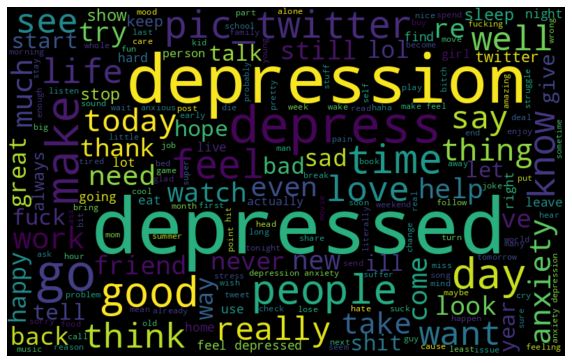

In [41]:
plot_word_cloud(data = tfidf_feature_names, target='None', check='val')

tf-idf could extract more word features when compare to CountVectorizer

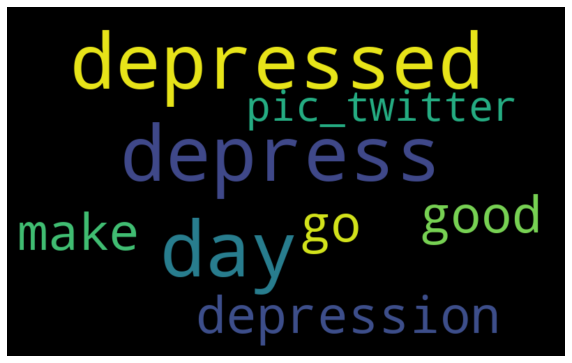

In [42]:
plot_word_cloud(data = tf_feature_names, target='None', check='val')

In [43]:
# Creating cleaned datasets
dic_o = {"text":original_dataset ,"new_label":Original_data_l}
dic_l = {"text":lda_dataset ,"new_label":Lda_label}
dic_n = {"text":nmf_dataset ,"new_label":Nmf_label}

In [44]:
# Creating cleaned dataset for all the three datasets using pandas dataframe
dataset_final = pd.DataFrame(dic_o)
dataset_lda = pd.DataFrame(dic_l)
dataset_nmf = pd.DataFrame(dic_n)

In [45]:
#Removing blank columns
dataset_final = dataset_final[dataset_final.text != '']
dataset_lda = dataset_lda[dataset_lda.text != '']
dataset_nmf = dataset_nmf[dataset_nmf.text != '']

In [46]:
dataset_final.head(10)

,text,new_label
0,real good moment missssssssss much,0
1,read manga,0
3,need send accountant tomorrow oddly even refer...,0
4,add com lookthunder,0
5,sleepy good time tonight,0
6,nbn already say fiber home mean least regular,0
7,possible today nice,0
8,nite workout ciao,0
9,night darlin sweet_dream,0
10,good morning,0


In [47]:
dataset_final.shape

(18991, 2)

In [48]:
dataset_lda.head(10)

,text,new_label
0,real good moment missssssssss much,1
1,read manga,0
3,need send accountant tomorrow oddly even refer...,0
4,add com lookthunder,0
5,sleepy good time tonight,1
6,nbn already say fiber home mean least regular,0
7,possible today nice,0
8,nite workout ciao,0
9,night darlin sweet_dream,0
10,good morning,1


In [49]:
dataset_nmf.head(10)

,text,new_label
0,real good moment missssssssss much,0
1,read manga,0
3,need send accountant tomorrow oddly even refer...,0
4,add com lookthunder,0
5,sleepy good time tonight,0
6,nbn already say fiber home mean least regular,0
7,possible today nice,0
8,nite workout ciao,0
9,night darlin sweet_dream,0
10,good morning,0


Analyzing the whole text in original dataset

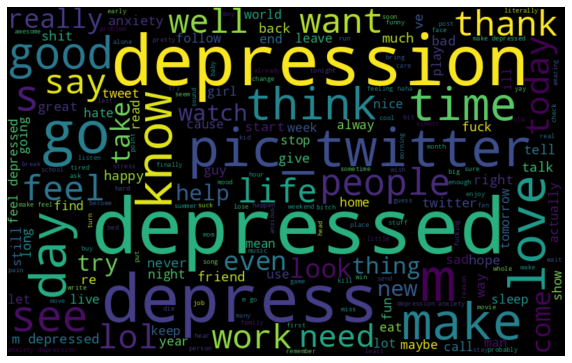

In [50]:
plot_word_cloud(data = dataset_final, target='None', check='all')

Analyzing non-depressed tweets labeled as 0 in original dataset

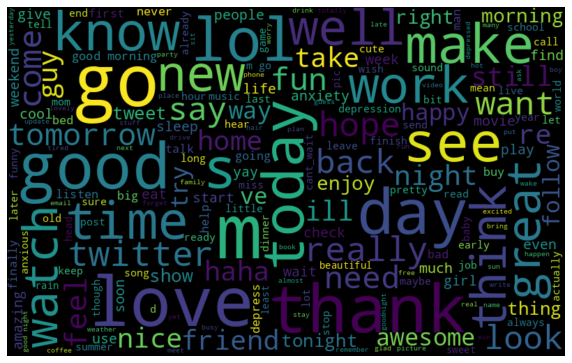

In [51]:
plot_word_cloud(data = dataset_final, target= 0, check='None')

Analyzing depressed tweets labeled as 1 in original dataset

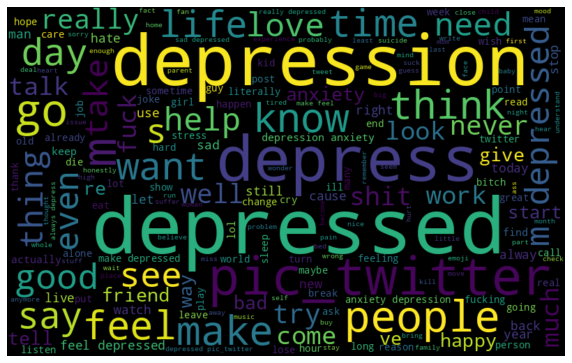

In [52]:
plot_word_cloud(data = dataset_final, target= 1, check='None')

Analyzing non-depressed tweets labeled as 0 in NMF dataset created using topic modeling

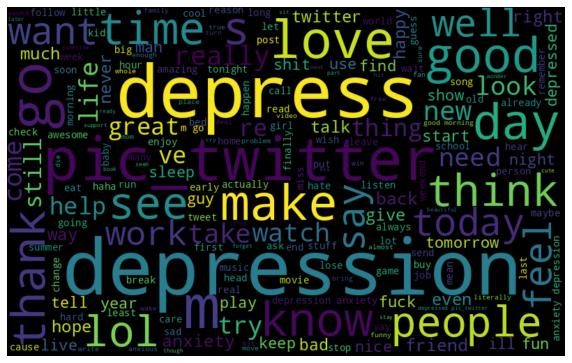

In [53]:
plot_word_cloud(data = dataset_nmf, target= 0, check='None')

Analyzing depressed tweets labeled as 1 in NMF dataset created using topic modeling

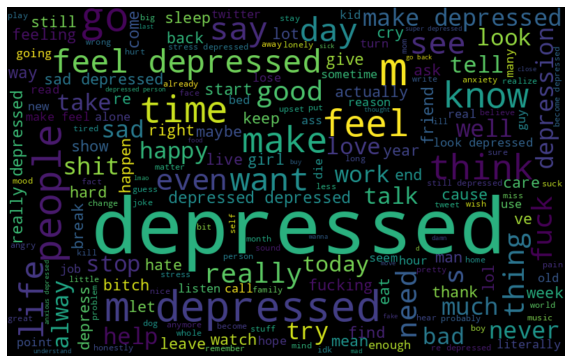

In [54]:
plot_word_cloud(data = dataset_nmf, target= 1, check='None')

After plotting the word cloud for NMF dataset, we could see that in both the depressed and non-depreseed tweets it contains depressing words such as depression and depress. These words are more dominating in non-depressed tweets which tends to confuse the ML models. We can conclude that topic modeling did not perform well on our dataset.

On the other hand, while comparing the word cloud for original dataset, where we could not find any depressing words such as "depressed", "depression" in non-depressed tweets labeled as 0.

In [55]:
#spillting the dataset into training(70%) and testing(30%)
x_train, x_test, y_train, y_test = train_test_split(dataset_final['text'].values, 
                                                    dataset_final['new_label'].values, 
                                                    test_size=0.30)

In [56]:
# instantiating the Keras tokenizer
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [57]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of datatset vocab is: ', V)

The size of datatset vocab is:  12928


In [58]:
# converting train and test sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)

print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [100, 1730, 197, 82, 48, 71, 119, 1203, 915, 45]
Testing sequence:  [196]


In [59]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)

The length of training sequence is:  51


In [60]:
# padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  51


In [61]:
def predict_sentiment(text, model):
    # preprocessing the given text 
    text_seq = tokenizer.texts_to_sequences(text)
    text_pad = pad_sequences(text_seq, maxlen=T)
   

    # predicting the class
    predicted_sentiment = model.predict(text_pad).round()

    if predicted_sentiment == 0.0:
        return(print(f'Class predicted {predicted_sentiment[0]}: User is in Non-depressed state'))
    else:
        return(print(f'Class predicted {predicted_sentiment[0]}: User is in depressed state'))

In [62]:
#Defining parameters for LSTM and CNN
vocab_size = V+1
embedding_dim = 200
maxlen = T

The below cell defines a LSTM model used in our project.

In [74]:
D = 128 
M = 15

i = Input (shape=(T, ))   
x = Embedding(V+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
x = LSTM(128, return_sequences=True, activation = 'relu')(x)
x = LSTM(128, activation = 'relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

lstm_model = Model(i,x)
lstm_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 51)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 51, 128)           1654912   
_________________________________________________________________
lstm_2 (LSTM)                (None, 51, 128)           131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,922,241
Trainable params: 1,922,241
Non-trainable params: 0
_________________________________________________

In [75]:
# compiling the lstm model
lstm_model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

Training the LSTM model for 6 epochs.

In [76]:
%%time
history_1 = lstm_model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=6)

Epoch 1/6
416/416 [==============================] - 131s 307ms/step - loss: 0.3992 - accuracy: 0.8150 - val_loss: 0.2878 - val_accuracy: 0.8745
Epoch 2/6
416/416 [==============================] - 127s 306ms/step - loss: 0.2156 - accuracy: 0.9160 - val_loss: 0.2893 - val_accuracy: 0.8838
Epoch 3/6
416/416 [==============================] - 128s 308ms/step - loss: 0.1488 - accuracy: 0.9446 - val_loss: 0.3364 - val_accuracy: 0.8740
Epoch 4/6
416/416 [==============================] - 129s 309ms/step - loss: 0.1141 - accuracy: 0.9559 - val_loss: 0.4049 - val_accuracy: 0.8589
Epoch 5/6
416/416 [==============================] - 127s 307ms/step - loss: 0.0944 - accuracy: 0.9640 - val_loss: 0.4188 - val_accuracy: 0.8654
Epoch 6/6
416/416 [==============================] - 129s 309ms/step - loss: 0.0773 - accuracy: 0.9679 - val_loss: 0.5179 - val_accuracy: 0.8710
CPU times: user 18min 33s, sys: 3min 2s, total: 21min 35s
Wall time: 13min 24s


In [66]:
# Evaluating the lstm model
_, accuracy_ls = lstm_model.evaluate(pad_train, y_train, verbose=False)
print("Training Accuracy of LSTM model: {:.4f}".format(accuracy_ls))
_, accuracy_ls_t = lstm_model.evaluate(pad_test, y_test, verbose=False)
print("Testing Accuracy of LSTM model:  {:.4f}".format(accuracy_ls_t))

Training Accuracy of LSTM model: 0.9189
Testing Accuracy of LSTM model:  0.8757


In [67]:
#Predicting the depressed tweet using LSTM model
text = ['life is in depression and i am sad']
predict_sentiment(text, lstm_model)

Class predicted [1.]: User is in depressed state


In [68]:
#Predicting the non-depressed tweet using LSTM model
text = ['life is hell and but i am motivated']
predict_sentiment(text, lstm_model)

Class predicted [0.]: User is in Non-depressed state


The below cell defines the CNN model used in our project.

In [69]:
textcnnmodel = Sequential()
textcnnmodel.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
textcnnmodel.add(Conv1D(128, 5, activation='relu'))
textcnnmodel.add(GlobalMaxPooling1D())
textcnnmodel.add(Dense(10, activation='relu'))
textcnnmodel.add(Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])
textcnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 51, 200)           2585800   
_________________________________________________________________
conv1d (Conv1D)              (None, 47, 128)           128128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,715,229
Trainable params: 2,715,229
Non-trainable params: 0
_________________________________________________________________


Training the CNN model for 10 epochs.


In [70]:
%%time
history_2 = textcnnmodel.fit(pad_train, y_train,
                     epochs=10,
                     verbose=1,
                     validation_data=(pad_test, y_test),
                     batch_size=10)

Epoch 1/10


2022-04-10 19:09:30.314477: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1330/1330 [==============================] - 15s 7ms/step - loss: 0.3303 - accuracy: 0.8517 - val_loss: 0.2849 - val_accuracy: 0.8917
Epoch 2/10
1330/1330 [==============================] - 8s 6ms/step - loss: 0.1835 - accuracy: 0.9326 - val_loss: 0.3083 - val_accuracy: 0.8850
Epoch 3/10
1330/1330 [==============================] - 9s 7ms/step - loss: 0.0920 - accuracy: 0.9654 - val_loss: 0.3928 - val_accuracy: 0.8668
Epoch 4/10
1330/1330 [==============================] - 9s 7ms/step - loss: 0.0566 - accuracy: 0.9777 - val_loss: 0.5293 - val_accuracy: 0.8580
Epoch 5/10
1330/1330 [==============================] - 9s 7ms/step - loss: 0.0417 - accuracy: 0.9830 - val_loss: 0.5397 - val_accuracy: 0.8619
Epoch 6/10
1330/1330 [==============================] - 9s 6ms/step - loss: 0.0355 - accuracy: 0.9853 - val_loss: 0.6142 - val_accuracy: 0.8517
Epoch 7/10
1330/1330 [==============================] - 9s 7ms/step - loss: 0.0312 - accuracy: 0.9859 - val_loss: 0.7349 - val_accuracy: 0.8456
Ep

In [71]:
# Evaluating the CNN model
_, accuracy_cn = textcnnmodel.evaluate(pad_train, y_train, verbose=False)
print("Training Accuracy of CNN model: {:.4f}".format(accuracy_cn))
_, accuracy_cn_t = textcnnmodel.evaluate(pad_test, y_test, verbose=False)
print("Testing Accuracy of CNN model:  {:.4f}".format(accuracy_cn_t))

Training Accuracy of CNN model: 0.9928
Testing Accuracy of CNN model:  0.8461


In [72]:
#Predicting the depressed tweet using CNN model
text = ['life is in depression but my childrens are dying bcoz of covid']
predict_sentiment(text, textcnnmodel)

Class predicted [1.]: User is in depressed state


In [73]:
#Predicting the non-depressed tweet using CNN model
text_test = ['i went on a bad date']
predict_sentiment(text_test, textcnnmodel)

Class predicted [0.]: User is in Non-depressed state
